In [1]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)
from BI import bi
import jax.numpy as jnp
# setup platform------------------------------------------------
m = bi(platform='cpu')

# import data ------------------------------------------------
m.data('../BI/resources/data/Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(data=['weight'])
m.data_to_model(['weight', 'height'])

 # define model ------------------------------------------------
def model(weight, height):    
    a = m.dist.normal( 178, 20, name = 'a')
    b = m.dist.lognormal(  0, 1, name = 'b')   
    s = m.dist.uniform( 0, 50, name = 's')
    m.dist.normal(a + b * weight , s, obs=height, shape=(weight.shape[0],))

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500,num_chains=1) 
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:10<00:00, 96.40it/s, 7 steps of size 7.95e-01. acc. prob=0.91]


,mean,sd,hdi_5.5%,hdi_94.5%
a,154.65,0.26,154.25,155.05
b,5.80,0.29,5.36,6.25
s,5.16,0.21,4.86,5.50


In [2]:
m.diag.loo()

Computed from 500 posterior samples and 346 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1058.49    14.59
p_loo        3.16        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.63]   (good)      346  100.0%
   (0.63, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [3]:
m.diag.WAIC()

Computed from 500 posterior samples and 346 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1058.47    14.59
p_waic        3.14        -

In [2]:
m.sample() # Predictions from model base on data in data_on_model
m.sample(data=dict(weight=jnp.array([0.4])), remove_obs=False)# Predictions from a given value

{'x': Array([149.74143803], dtype=float64)}

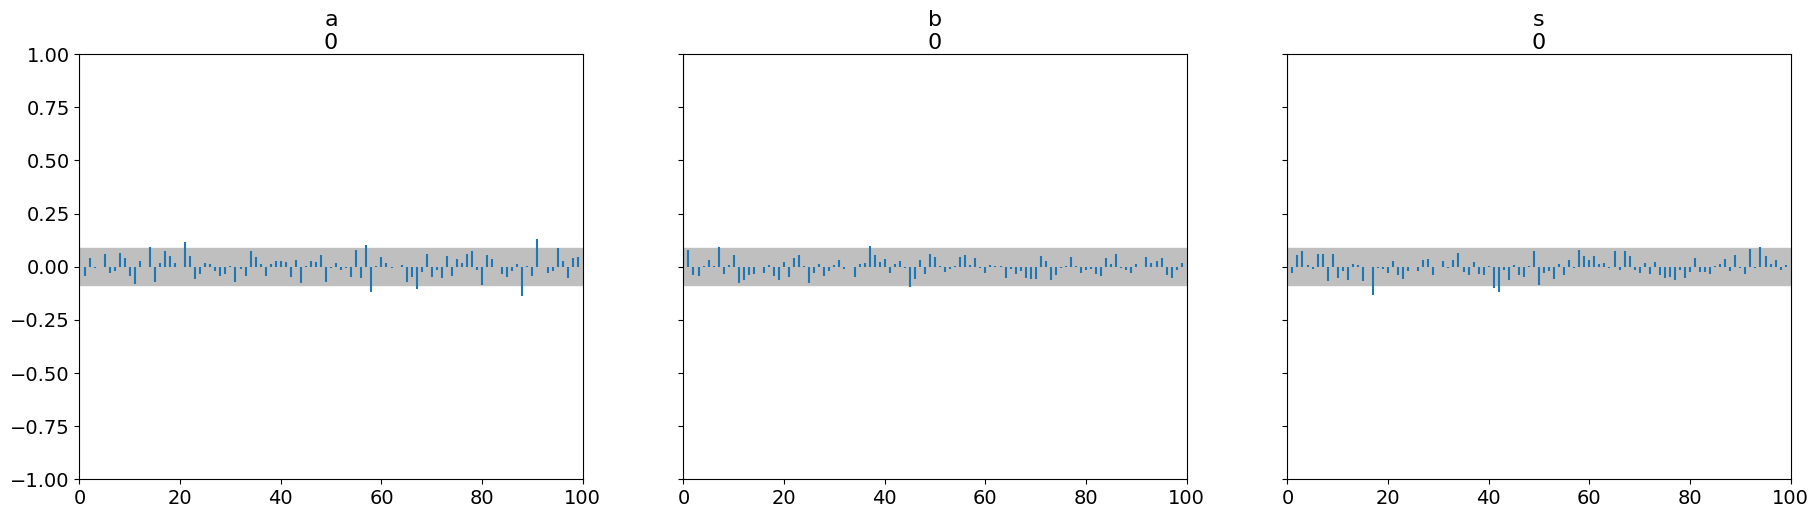

In [3]:
m.diag.autocor()

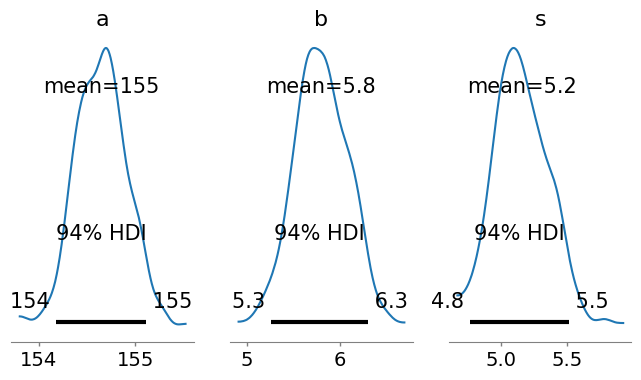

In [4]:
m.diag.posterior()

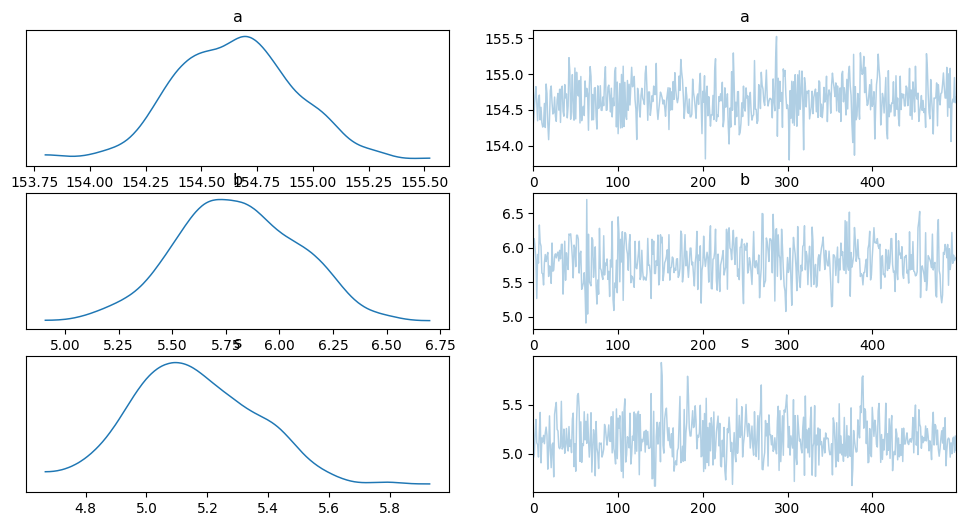

In [5]:
m.diag.traces()

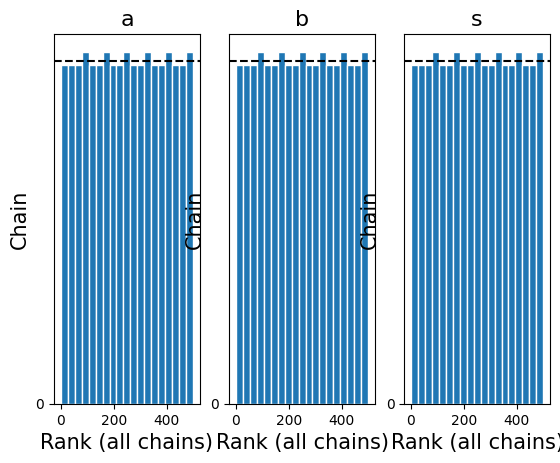

In [6]:
m.diag.rank()

array([<Axes: >, <Axes: title={'center': 'ess'}>], dtype=object)

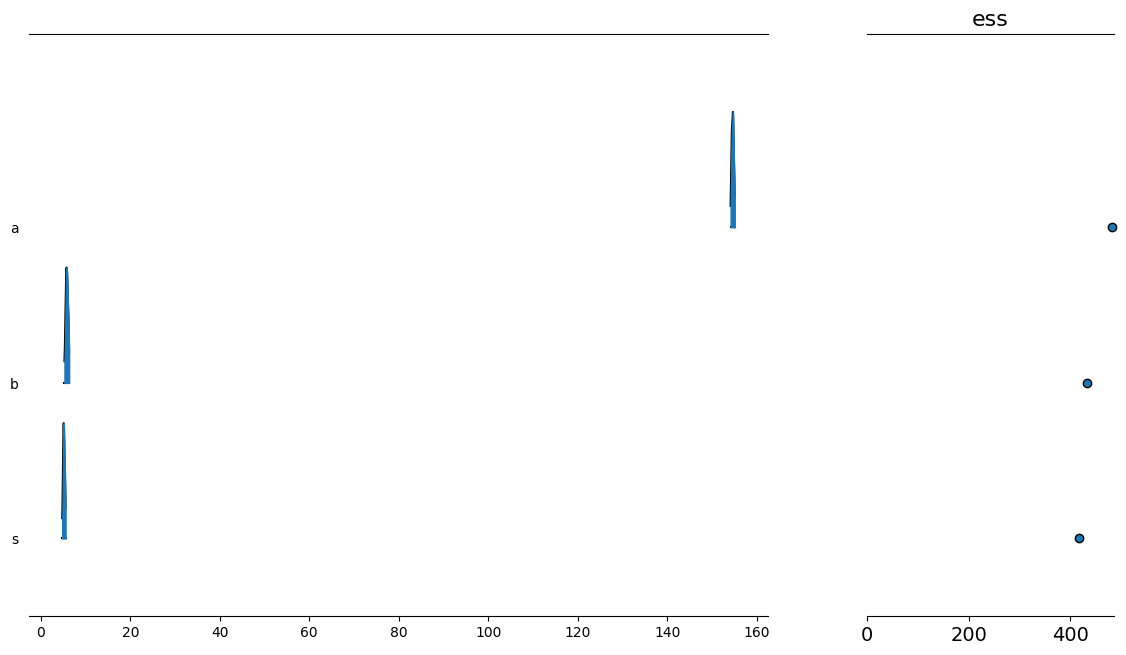

In [7]:
m.diag.forest()

array([[<Axes: ylabel='a'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='b'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='a', ylabel='s'>, <Axes: xlabel='b'>,
        <Axes: xlabel='s'>]], dtype=object)

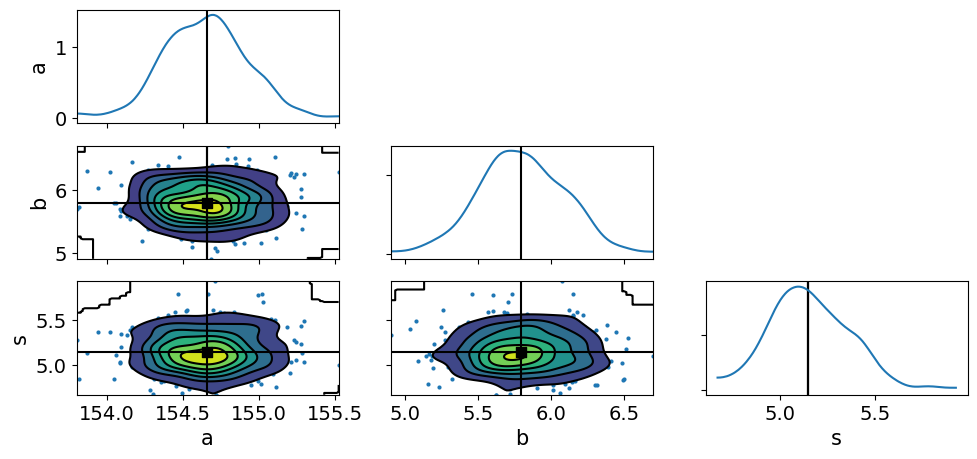

In [8]:
m.diag.pair()

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 's'}>]], dtype=object)

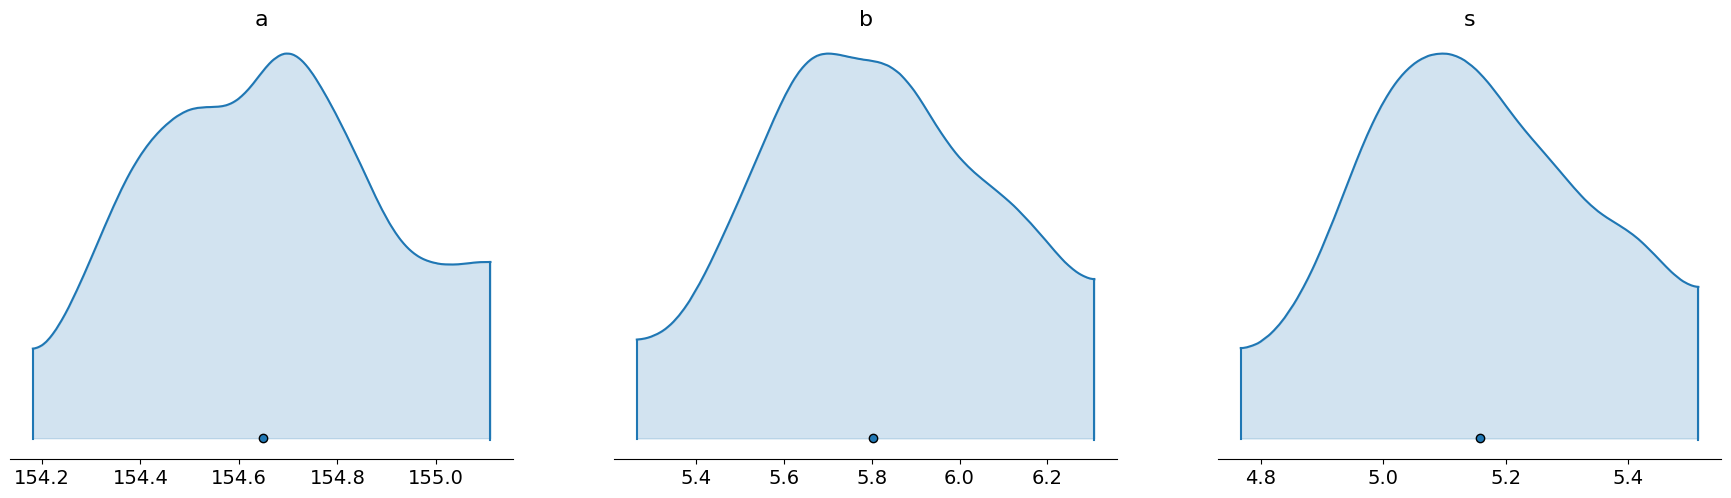

In [9]:
m.diag.density()

array([<Axes: title={'center': 'a'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'b'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 's'}, xlabel='Total number of draws', ylabel='ESS'>],
      dtype=object)

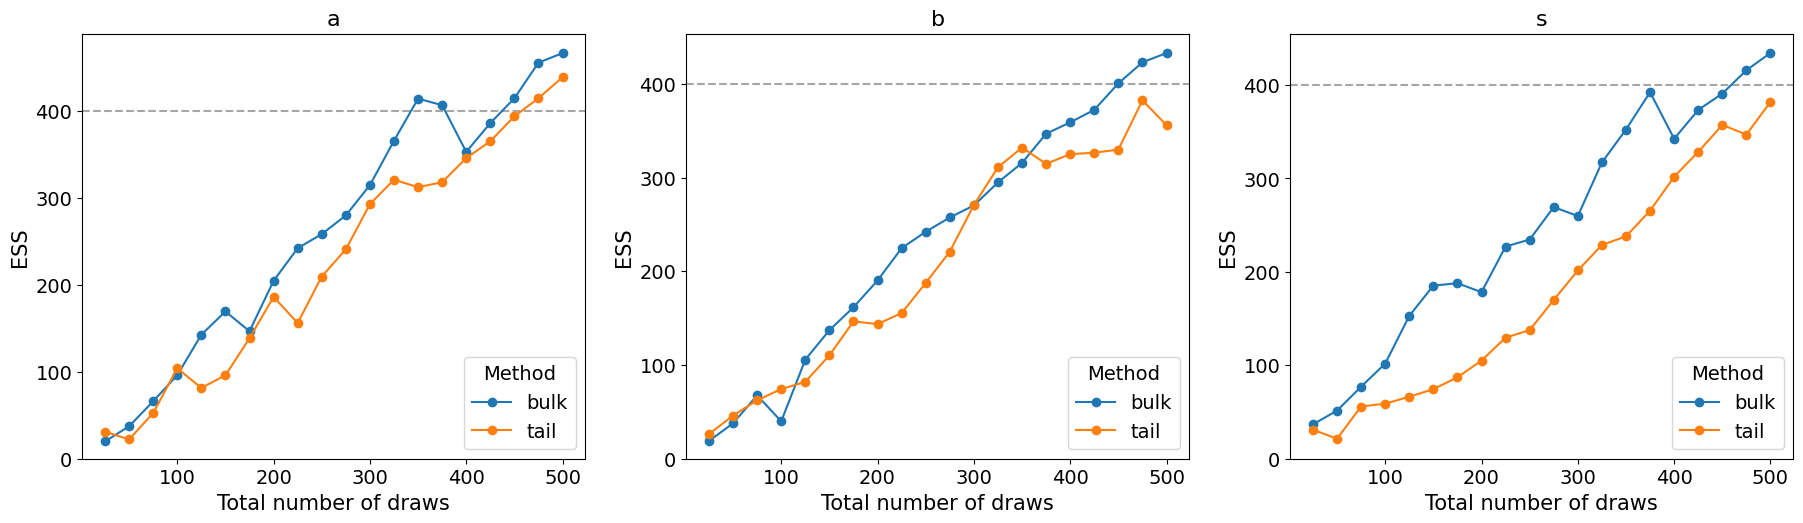

In [10]:
m.diag.plot_ess()

array([[<Axes: title={'center': 'a'}>,
        <Axes: title={'center': 'a'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'b'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 's'}>,
        <Axes: title={'center': 's'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

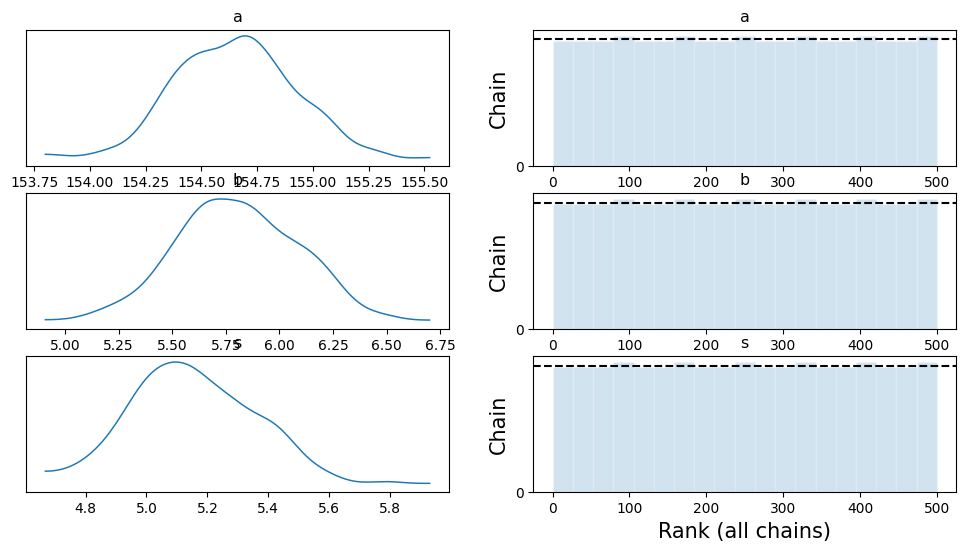

In [11]:
m.diag.plot_trace()